# Clean & Analyze Social Media

## Introduction

Social media has become a ubiquitous part of modern life, with platforms such as Instagram, Twitter, and Facebook serving as essential communication channels. Social media data sets are vast and complex, making analysis a challenging task for businesses and researchers alike. In this project, we explore a simulated social media, for example Tweets, data set to understand trends in likes across different categories.

## Prerequisites

To follow along with this project, you should have a basic understanding of Python programming and data analysis concepts. In addition, you may want to use the following packages in your Python environment:

- pandas
- Matplotlib
- ...

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install pandas`
- `!pip install matplotlib`

## Project Scope

The objective of this project is to analyze tweets (or other social media data) and gain insights into user engagement. We will explore the data set using visualization techniques to understand the distribution of likes across different categories. Finally, we will analyze the data to draw conclusions about the most popular categories and the overall engagement on the platform.

## Step 1: Importing Required Libraries

As the name suggests, the first step is to import all the necessary libraries that will be used in the project. In this case, we need pandas, numpy, matplotlib, seaborn, and random libraries.

Pandas is a library used for data manipulation and analysis. Numpy is a library used for numerical computations. Matplotlib is a library used for data visualization. Seaborn is a library used for statistical data visualization. Random is a library used to generate random numbers.

In [ ]:
# your code here

In [1]:
!pip install --upgrade pip

     |████████████████████████████████| 2.1 MB 33.9 MB/s            
  Attempting uninstall: pip
    Found existing installation: pip 21.3.1
    Uninstalling pip-21.3.1:
      Successfully uninstalled pip-21.3.1


In [2]:
!pip install --upgrade seaborn --force-reinstall

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 41.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 93.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 161.2 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 131.4 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 147.7 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 147.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 154.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.5/53.5 kB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 165.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 47.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 81.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.2/509.2 kB 111.6 MB/s eta 0:00:00
  Attempting 

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
%matplotlib inline

from scipy import stats  # Add for statistical analysis
from sklearn.preprocessing import StandardScaler  # Add for feature scaling
from scipy.stats import f_oneway

import warnings
warnings.filterwarnings('ignore')

Step 2: Generate random data for the social media data
Now that I have the required imports, I need to generate some random tweet data to analyze. There are many ways to generate random data in Python, but some are more convenient than others. In this case, I will use pandas date range to choose a pseudo-random date within a range, the random module’s choice to create a choice from a list, and numpy’s random to create a random integer.

In [5]:
n = 100000
start_date = '2021-01-01'
end_date = '2025-06-30'

# Generate random dates
date_range = pd.date_range(start_date, end_date, periods=n)

# Category configuration
categories = ['Food', 'Travel', 'Fashion', 'Fitness', 'Music', 'Culture', 'Family', 'Health']
weights = [0.15, 0.12, 0.13, 0.1, 0.08, 0.12, 0.15, 0.15]
category_choices = random.choices(categories, weights=weights, k=n)

# Likes ranges by category
category_likes_ranges = {
    'Food': (0, 10000),
    'Travel': (500, 15000),
    'Fashion': (2000, 8000),
    'Fitness': (3000, 12000),
    'Music': (900, 25000),
    'Culture': (500, 3000),
    'Family': (200, 3000),
    'Health': (1000, 12000)
}

# Generate likes with realistic distribution
likes = []
for category in category_choices:
    likes_range = category_likes_ranges.get(category, (0, 10000))
    a, b = 2, 5  # Beta distribution parameters
    skew_factor = np.random.beta(a, b)
    likes.append(int(likes_range[0] + skew_factor * (likes_range[1] - likes_range[0])))


# Add missing values (10% of data)
missing_indices = random.sample(range(n), int(n * 0.1))
for idx in missing_indices:
    category_choices[idx] = np.nan

# Add duplicates (5% of data)
duplicate_indices = random.sample(range(n), int(n * 0.05))
duplicate_data = {
    'Date': [random.choice(date_range) for _ in range(len(duplicate_indices))],
    'Category': [random.choice(categories) for _ in range(len(duplicate_indices))]
}

duplicate_data['Likes'] = [
    random.randint(category_likes_ranges[category][0], category_likes_ranges[category][1]) 
    for category in duplicate_data['Category']
]

# Combine into final dataset
data = {
    'Date': date_range.tolist() + duplicate_data['Date'],
    'Category': category_choices + duplicate_data['Category'],
    'Likes': likes + duplicate_data['Likes']
}

Step 3: Load the data into a Pandas DataFrame and Explore the data
The next step is to load the randomly generated data into the pandas dataframe and print the data. To do so, We need to use the DataFrame method of the pandas object and pass the data to it. Then, print the dataframe head, the dataframe information, and the dataframe description.

Finally, print the count of each ‘Category’element.

In [6]:
# Create DataFrame
twitter_df = pd.DataFrame(data)

# Initial inspection
print("DataFrame with Dirty Data:")
display(twitter_df.head())

# Basic info
print('\nDataFrame Information:')
twitter_df.info()

# Statistical summary
print('\n DataFrame Description:')
display(twitter_df.describe(include='all'))

# Outlier detection
z_scores = np.abs(stats.zscore(twitter_df['Likes'].dropna()))
print(f"\n Potential outliers (z-score > 3): {(z_scores > 3).sum()}")

# Category distribution
print('\n Category Distribution with Percentages:')
category_dist = twitter_df['Category'].value_counts(normalize=True).mul(100).round(1)
display(category_dist)

DataFrame with Dirty Data:


,Date,Category,Likes
0,2021-01-01 00:00:00.000000000,NaN,1240
1,2021-01-01 00:23:37.838178381,Travel,3460
2,2021-01-01 00:47:15.676356763,Food,3215
3,2021-01-01 01:10:53.514535145,Health,4784
4,2021-01-01 01:34:31.352713527,Food,4023



DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   Date      105000 non-null  datetime64[ns]
 1   Category  95000 non-null   object        
 2   Likes     105000 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.4+ MB

 DataFrame Description:


,Date,Category,Likes
count,105000,95000,105000.000000
unique,100000,8,NaN
top,2024-10-23 17:07:00.232202336,Health,NaN
freq,4,14171,NaN
first,2021-01-01 00:00:00,NaN,NaN
last,2025-06-30 00:00:00,NaN,NaN
mean,NaN,NaN,3693.153895
std,NaN,NaN,2795.743446
min,NaN,NaN,32.000000
25%,NaN,NaN,1458.750000



 Potential outliers (z-score > 3): 1631

 Category Distribution with Percentages:


Health     14.9
Food       14.9
Family     14.6
Fashion    13.1
Travel     11.9
Culture    11.9
Fitness    10.3
Music       8.3
Name: Category, dtype: float64

In [7]:
#Print DataFrame information
print('\nDataFrame Information:')
print(twitter_df.info())


DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   Date      105000 non-null  datetime64[ns]
 1   Category  95000 non-null   object        
 2   Likes     105000 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.4+ MB
None


In [8]:
#Print DataFrame description
print('\nDataFrame Description:')
print(twitter_df.describe())


DataFrame Description:
               Likes
count  105000.000000
mean     3693.153895
std      2795.743446
min        32.000000
25%      1458.750000
50%      3219.000000
75%      5044.000000
max     24995.000000


In [9]:
#Print the count of each 'Category' element
category_counts = twitter_df['Category'].value_counts()
print('\nCount of each "Category" element:')
print(category_counts)


Count of each "Category" element:
Health     14171
Food       14152
Family     13912
Fashion    12492
Travel     11346
Culture    11262
Fitness     9771
Music       7894
Name: Category, dtype: int64


Step 4: Clean the data
An important aspect of processing data is to remove invalid data points so you can effectively perform statistics and visualize valid data. The pandas dataframe has built-in functionality to clean the data. First, remove all the null data using the appropriate dataframe drop method. Next, remove duplicate data from the dataframe.

To appropriately display the data field, convert the dataframe field to a datetime format using the pandas object (not the dataframe).

In [10]:
#  Data Cleaning


# Remove null values
twitter_df.dropna(inplace=True)

# Remove duplicates
twitter_df.drop_duplicates(inplace=True)

# Convert data types
twitter_df['Date'] = pd.to_datetime(twitter_df['Date'])
twitter_df['Likes'] = twitter_df['Likes'].astype(int)

# Handle outliers using IQR
Q1 = twitter_df['Likes'].quantile(0.25)
Q3 = twitter_df['Likes'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
twitter_df = twitter_df[(twitter_df['Likes'] >= lower_bound) & (twitter_df['Likes'] <= upper_bound)]

print("\nCleaned DataFrame:")
display(twitter_df.head())


Cleaned DataFrame:


,Date,Category,Likes
1,2021-01-01 00:23:37.838178381,Travel,3460
2,2021-01-01 00:47:15.676356763,Food,3215
3,2021-01-01 01:10:53.514535145,Health,4784
4,2021-01-01 01:34:31.352713527,Food,4023
5,2021-01-01 01:58:09.190891908,Health,2894


In [11]:

#  Feature Engineering


# Extract temporal features
twitter_df['Year'] = twitter_df['Date'].dt.year
twitter_df['Month'] = twitter_df['Date'].dt.month
twitter_df['DayOfWeek'] = twitter_df['Date'].dt.dayofweek
twitter_df['Weekend'] = twitter_df['DayOfWeek'].isin([5, 6]).astype(int)

# Create engagement categories
twitter_df['EngagementLevel'] = pd.cut(twitter_df['Likes'],
                                     bins=[0, 1000, 5000, 10000, np.inf],
                                     labels=['Low', 'Medium', 'High', 'Very High'])

# One-hot encode categories
category_dummies = pd.get_dummies(twitter_df['Category'], prefix='Category')
twitter_df = pd.concat([twitter_df, category_dummies], axis=1)

display(twitter_df.head())


,Date,Category,Likes,Year,Month,DayOfWeek,Weekend,EngagementLevel,Category_Culture,Category_Family,Category_Fashion,Category_Fitness,Category_Food,Category_Health,Category_Music,Category_Travel
1,2021-01-01 00:23:37.838178381,Travel,3460,2021,1,4,0,Medium,0,0,0,0,0,0,0,1
2,2021-01-01 00:47:15.676356763,Food,3215,2021,1,4,0,Medium,0,0,0,0,1,0,0,0
3,2021-01-01 01:10:53.514535145,Health,4784,2021,1,4,0,Medium,0,0,0,0,0,1,0,0
4,2021-01-01 01:34:31.352713527,Food,4023,2021,1,4,0,Medium,0,0,0,0,1,0,0,0
5,2021-01-01 01:58:09.190891908,Health,2894,2021,1,4,0,Medium,0,0,0,0,0,1,0,0


Step 5: Visualize and Analyze the data
An important aspect of data analysis is the ability to physically view it to visually observe relationships among the data using charts and graphs. The second way to analyze the data is to perform statistics on it, for example compute the average

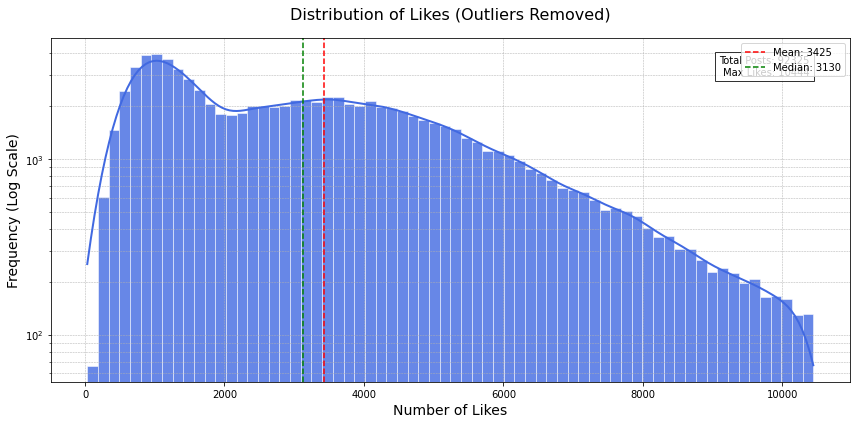

In [12]:
#  Distribution of Likes

plt.figure(figsize=(12, 6))
iqr = np.percentile(twitter_df['Likes'], 75) - np.percentile(twitter_df['Likes'], 25)
bin_width = 2 * iqr / (len(twitter_df['Likes']) ** (1/3))
bins = int((twitter_df['Likes'].max() - twitter_df['Likes'].min()) / bin_width)

ax = sns.histplot(
    data=twitter_df,
    x='Likes',
    bins=bins,
    kde=True,
    color='royalblue',
    edgecolor='white',
    linewidth=0.5,
    alpha=0.8,
    line_kws={'color': 'darkred', 'linewidth': 2}
)

plt.title('Distribution of Likes (Outliers Removed)', fontsize=16, pad=20)
plt.xlabel('Number of Likes', fontsize=14)
plt.ylabel('Frequency (Log Scale)', fontsize=14)
plt.yscale('log')

mean_likes = twitter_df['Likes'].mean()
median_likes = twitter_df['Likes'].median()
plt.axvline(mean_likes, color='red', linestyle='--', linewidth=1.5, label=f'Mean: {mean_likes:.0f}')
plt.axvline(median_likes, color='green', linestyle='--', linewidth=1.5, label=f'Median: {median_likes:.0f}')

plt.text(
    0.95, 0.95,
    f'Total Posts: {len(twitter_df)}\nMax Likes: {twitter_df["Likes"].max()}',
    transform=ax.transAxes,
    ha='right',
    va='top',
    bbox=dict(facecolor='white', alpha=0.8)
)

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(frameon=True, framealpha=0.8)
plt.tight_layout()
plt.show()

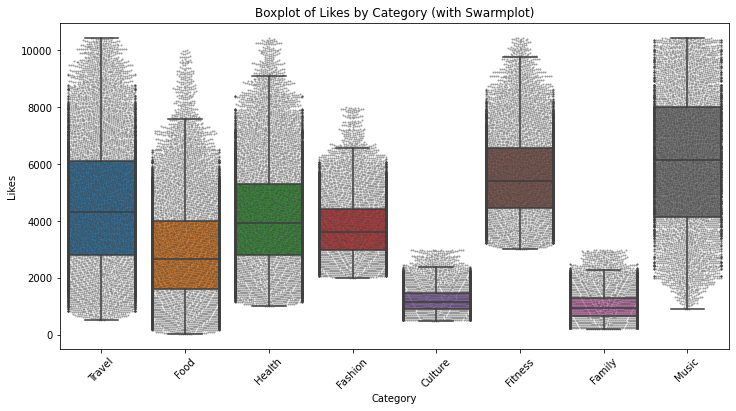

In [13]:
# Boxplot with swarmplot overlay
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Likes', data=twitter_df, showfliers=False)
sns.swarmplot(x='Category', y='Likes', data=twitter_df, color='.25', size=2, alpha=0.5)
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Likes')
plt.title('Boxplot of Likes by Category (with Swarmplot)')
plt.show()

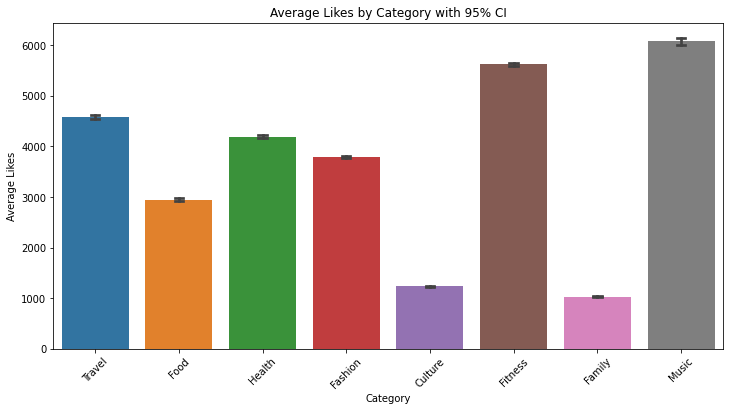

In [14]:
# Bar chart with confidence intervals
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Likes', data=twitter_df, ci=95, capsize=0.1)
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Average Likes')
plt.title('Average Likes by Category with 95% CI')
plt.show()


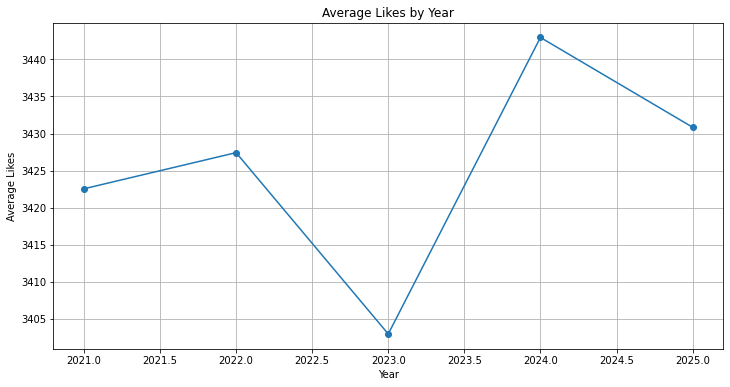

In [15]:
# Likes over time
plt.figure(figsize=(12, 6))
twitter_df.groupby('Year')['Likes'].mean().plot(kind='line', marker='o')
plt.title('Average Likes by Year')
plt.xlabel('Year')
plt.ylabel('Average Likes')
plt.grid(True)
plt.show()

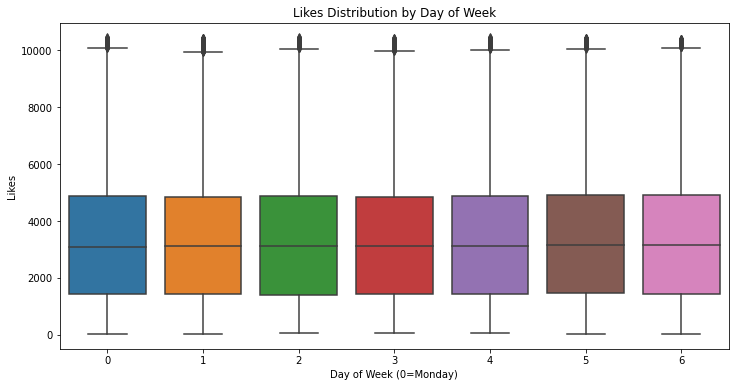

In [16]:
# Engagement by day of week
plt.figure(figsize=(12, 6))
sns.boxplot(x='DayOfWeek', y='Likes', data=twitter_df)
plt.title('Likes Distribution by Day of Week')
plt.xlabel('Day of Week (0=Monday)')
plt.ylabel('Likes')
plt.show()

In [20]:
#  Step 7: Statistical Analysis

# Basic statistics
print("Mean of 'Likes':", twitter_df['Likes'].mean())
print("Median of 'Likes':", twitter_df['Likes'].median())
print("Standard Deviation of 'Likes':", twitter_df['Likes'].std())

# Grouped statistics
print("\nDetailed Statistics by Category:")
category_stats = twitter_df.groupby('Category')['Likes'].agg(['mean', 'median', 'std', 'count'])
display(category_stats)

# Analysis of Variance (ANOVA) test
groups = [group['Likes'].values for name, group in twitter_df.groupby('Category')]
f_val, p_val = f_oneway(*groups)
print(f"\nANOVA test for category differences: F-value={f_val:.2f}, p-value={p_val:.4f}")

# Correlation analysis
print("\nCorrelation Matrix:")
display(twitter_df[['Likes', 'Year', 'Month', 'DayOfWeek', 'Weekend']].corr())

Mean of 'Likes': 3424.723011102085
Median of 'Likes': 3130.0
Standard Deviation of 'Likes': 2250.146171788599

Detailed Statistics by Category:


,mean,median,std,count
Category,,,,
Culture,1235.723140,1167.0,438.371646,11262
Family,1032.911371,963.0,487.908580,13912
Fashion,3790.537944,3622.0,1048.399118,12492
Fitness,5626.762556,5425.0,1501.835977,9657
Food,2952.002473,2682.0,1743.985382,14152
Health,4191.887083,3936.0,1828.754336,14090
Music,6076.173070,6131.5,2383.468011,5778
Travel,4576.886997,4329.0,2233.641575,10982



ANOVA test for category differences: F-value=14994.20, p-value=0.0000

Correlation Matrix:


,Likes,Year,Month,DayOfWeek,Weekend
Likes,1.000000,0.001956,-0.003876,0.007148,0.008383
Year,0.001956,1.000000,-0.163627,-0.000369,0.001218
Month,-0.003876,-0.163627,1.000000,0.004319,0.002177
DayOfWeek,0.007148,-0.000369,0.004319,1.000000,0.791119
Weekend,0.008383,0.001218,0.002177,0.791119,1.000000


In [21]:
#  Step 8: Prepare for Modeling

# Feature scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(twitter_df[['Likes', 'Year', 'Month', 'DayOfWeek']])